In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_train.csv'
x_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_train.csv'
y_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_test.csv'
x_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_test.csv'
y_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np

In [5]:
regr = RandomForestRegressor(max_depth=12, random_state=42)
regr.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
rbfpredictions =  regr.predict(x_test.to_numpy())
y_test = np.array(y_test)
marks =  regr.score(x_test.to_numpy(), y_test)
print(marks)

0.8767545438277176


In [6]:
param_grid = {'max_depth': [1, 10], 'max_features': ['auto', 'sqrt'], 'n_estimators': [100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose=2)
grid.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test.to_numpy())
print(grid_predictions)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=  18.7s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=  20.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=  18.1s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=  19.2s
[CV] END ...max_depth=1, max_features=auto, n_estimators=100; total time=  20.9s
[CV] END ...max_depth=1, max_features=auto, n_estimators=200; total time=  49.9s
[CV] END ...max_depth=1, max_features=auto, n_estimators=200; total time=  36.1s
[CV] END ...max_depth=1, max_features=auto, n_estimators=200; total time=  36.9s
[CV] END ...max_depth=1, max_features=auto, n_estimators=200; total time=  38.4s
[CV] END ...max_depth=1, max_features=auto, n_estimators=200; total time=  37.2s
[CV] END ...max_depth=1, max_features=sqrt, n_estimators=100; total time=   5.9s
[CV] END ...max_depth=1, max_features=sqrt, n_est

In [8]:
RFR = RandomForestRegressor(max_depth=10, random_state=42)
RFR.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
y_pred =  RFR.predict(x_test.to_numpy())
y_test = np.array(y_test)
test_score =  RFR.score(x_test.to_numpy(), y_test)
test_score

0.7874083348581493

In [9]:
train_sizes = [1, 25, 50, 100, 500, 2500, 7500, 15000]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = RFR,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_absolute_error')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [16]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1        2.700062e-14
25       3.190086e+00
50       2.912515e+00
100      2.865245e+00
500      3.133138e+00
2500     2.853906e+00
7500     3.064285e+00
15000    3.126170e+00
dtype: float64

 --------------------

Mean validation scores

 1        8.571787
25       8.575514
50       8.138348
100      7.562962
500      6.366424
2500     4.568179
7500     3.890957
15000    3.591084
dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Mean Abs Error:', mean_absolute_error(y_test, y_pred))

Mean squared error: 20.99
Coefficient of determination: 0.79
Mean Abs Error: 3.3134270342874816


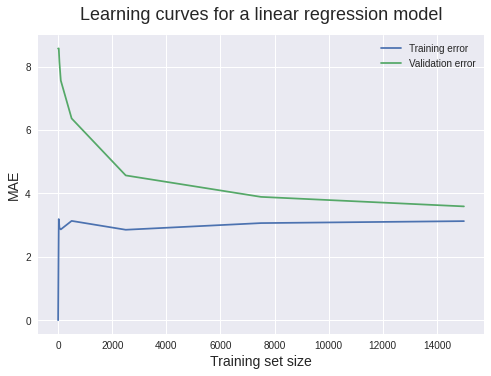

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
x_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MDAverage,MDSum,MDMin,MDMax
0,-0.093901,1.762418,0.431348,-0.275106,0.274825,-0.017506,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.173748,-0.278694,-0.271794,-1.358972,-0.427943,-0.084662
1,-0.328545,-1.254765,-1.724605,-0.275106,-2.101054,-1.249747,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.013147,0.666407,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.032480,0.745759,-0.973655,3.634961,0.954577,-1.736101,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.119378,-0.814841,-0.271794,-1.358972,-0.427943,-0.084662
3,-0.328545,-1.385947,1.133850,-0.275106,-0.143651,1.277984,1.481708,-0.173069,-0.068486,0.125175,0.534460,-0.845616,0.184464,0.379958,1.899788,-0.173069,1.481708
4,0.531819,0.385008,-0.997879,-0.275106,0.854294,-1.365338,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.982581,1.314184,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82540,-1.188910,-0.631651,-1.579260,-0.275106,-1.683121,-1.459119,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.473255,0.565510,-0.271794,-1.358972,-0.427943,-0.084662
82541,0.688249,-0.795628,0.891608,-0.275106,-0.042826,0.586620,3.080816,0.031387,-0.079891,2.718102,1.493845,1.258573,-0.484781,1.448852,7.244258,-0.079891,3.080816
82542,-0.406760,0.385008,0.431348,-0.275106,-0.694933,0.475391,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.057727,-0.720922,-0.271794,-1.358972,-0.427943,-0.084662
82543,0.922894,-0.434878,-1.458139,-0.275106,-0.273747,-1.212671,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.142275,0.876250,-0.271794,-1.358972,-0.427943,-0.084662


In [ ]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [ ]:
y_pred = grid.predict(submission_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([30.65010319, 35.68213481, 23.12887563, ..., 31.87250558,
       19.1840608 ,  7.68295801])

In [ ]:
weekly_sales = np.round(y_pred**3, 2)
weekly_sales

array([28793.59, 45431.02, 12372.67, ..., 32377.9 ,  7060.28,   453.51])

In [ ]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
RFR_submission = pd.DataFrame(data=sub)
RFR_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,28793.59
1,1_1_2012-11-09,45431.02
2,1_1_2012-11-16,12372.67
3,1_1_2012-11-23,40131.68
4,1_1_2012-11-30,24959.73
...,...,...
115059,45_98_2013-06-28,18226.20
115060,45_98_2013-07-05,21866.65
115061,45_98_2013-07-12,32377.90
115062,45_98_2013-07-19,7060.28


In [ ]:
from google.colab import drive
drive.mount('drive')
RFR_submission.to_csv('RFR_submission2.csv')
!cp RFR_submission2.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
